# Basic mapmaking test with $h_n$ functions

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from mapbased_syste.mapmaking import SystematicsSimulation
from mapbased_syste.io import read_h_n_files

First reading the $h_n$ files

In [2]:
path_h_n_files = '/global/cfs/cdirs/sobs/sims/scan-s0001/h_n_maps/'

h_n_names = 'high_cadence_constant_scan_3_el_w13_p000_f150_A'

In [3]:
h_n_spin_dict = read_h_n_files(path_h_n_files+h_n_names, list_spin=[2,4])

/global/homes/m/mag/.conda/envs/beams_env/lib/python3.10/site-packages/healpy/projector.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


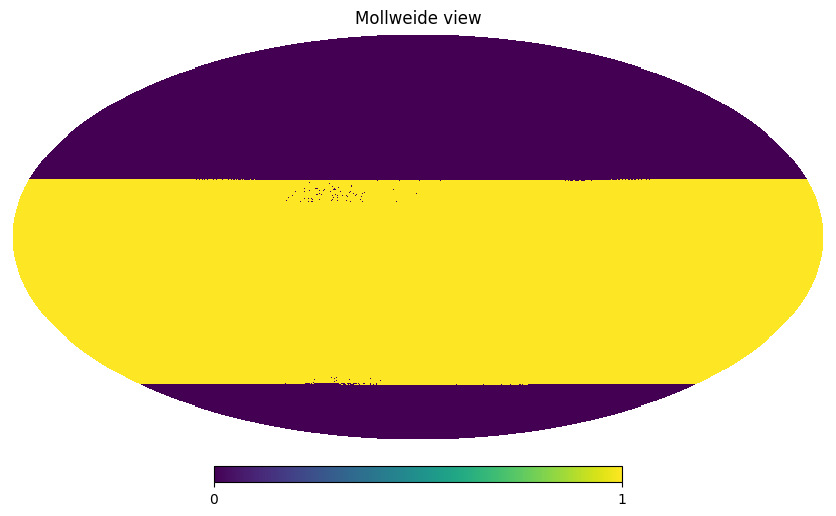

In [4]:
mask = np.zeros_like(h_n_spin_dict[2])
mask[h_n_spin_dict[2] != 0] = 1

hp.mollview(mask)

Then creating the `SystematicsSimulation` object

In [5]:
nside = hp.npix2nside(h_n_spin_dict[2].size)

syste_object = SystematicsSimulation(nside=nside, nstokes=2, lmax=2*nside, list_spin_output=[-2,2])

Now preparing the input maps

In [6]:
%%time
spin_cmb_maps = syste_object.get_spin_cmb_maps()

spin_cmb_maps = {spin:spin_cmb_maps[spin]*mask for spin in spin_cmb_maps.keys()}

Calculating spectra from CAMB !
CPU times: user 30min 31s, sys: 10.5 s, total: 30min 41s
Wall time: 30.9 s


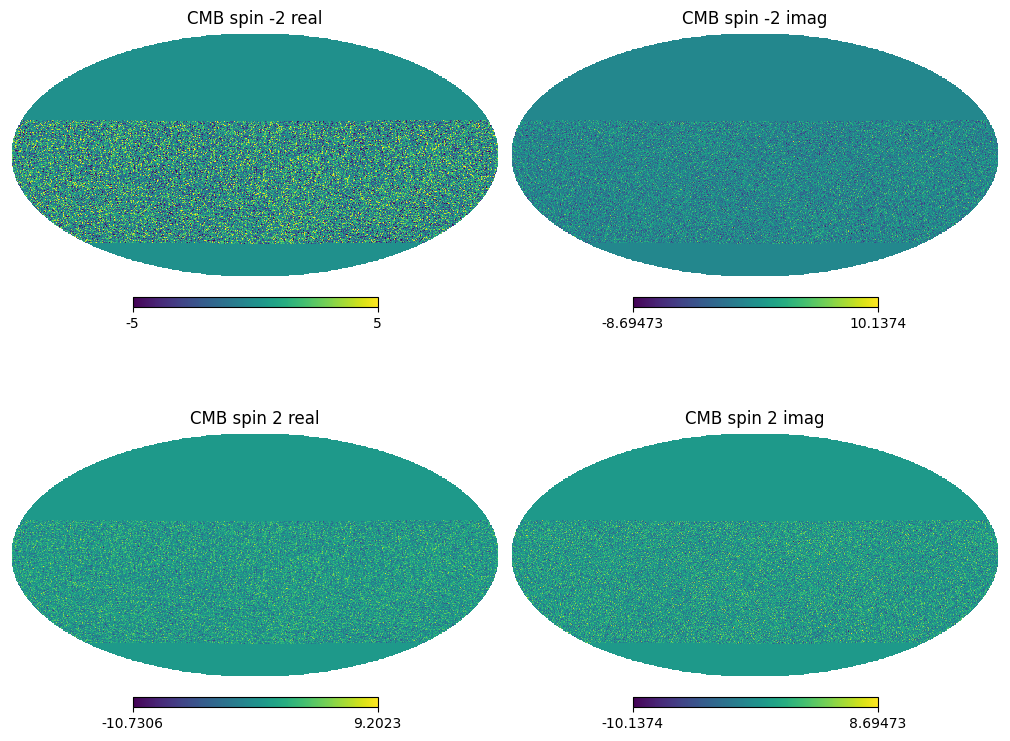

In [7]:
plt.figure(figsize=(10,8))
hp.mollview(spin_cmb_maps[-2].real, sub=(2,2,1), title='CMB spin -2 real', min=-5, max=5)
hp.mollview(spin_cmb_maps[-2].imag, sub=(2,2,2), title='CMB spin -2 imag')
hp.mollview(spin_cmb_maps[2].real, sub=(2,2,3), title='CMB spin 2 real')
hp.mollview(spin_cmb_maps[2].imag, sub=(2,2,4), title='CMB spin 2 imag')

In [8]:
spin_systematics_maps = {spin: 0 for spin in spin_cmb_maps.keys()}

And finally performing mapmaking

In [9]:
%%time
final_maps = syste_object.compute_total_maps(mask, h_n_spin_dict, spin_cmb_maps, spin_systematics_maps)

CPU times: user 20.2 s, sys: 3.55 s, total: 23.8 s
Wall time: 23.8 s


In [ ]:
final_Q_map = (final_maps[-2,:] + final_maps[-1,:])/2.
final_U_map = 1j*(final_maps[-2,:] - final_maps[-1,:])/2.

In [15]:
extended_final_maps = np.zeros((2,12*nside**2), dtype=complex)
extended_final_maps[0, mask != 0] = final_Q_map
extended_final_maps[1, mask != 0] = final_U_map

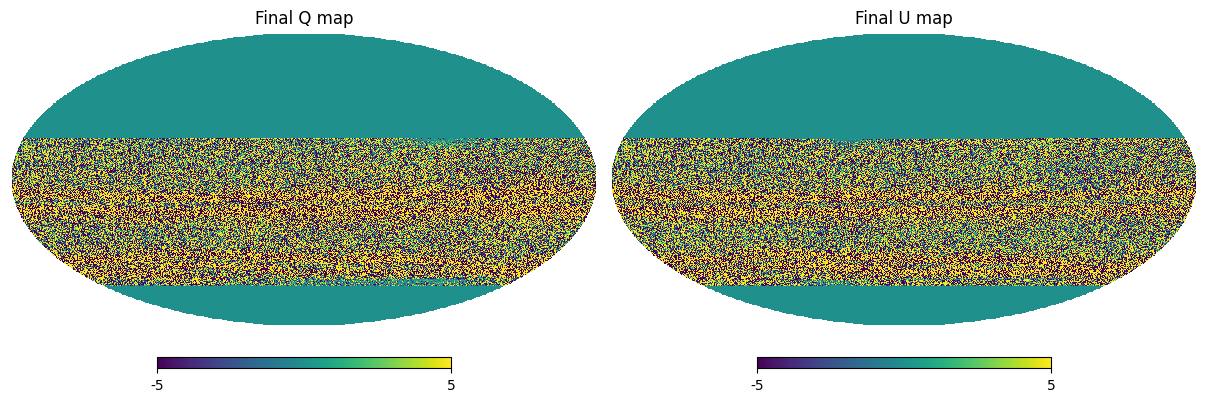

In [22]:
plt.figure(figsize=(12,6))
hp.mollview(extended_final_maps[0], sub=(1,2,1), title='Final Q map', min=-5, max=5)
hp.mollview(extended_final_maps[1], sub=(1,2,2), title='Final U map', min=-5, max=5)
plt.show()